In [29]:
import numpy as np
import pandas as pd
import os

In [30]:
#IMPORT DATA
csv_path = os.path.join(os.getcwd(), "housing.csv")
df = pd.read_csv(csv_path)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [31]:
#FIND COLUMNS THAT INCLUDE EMPTY CELLS
null_column_header = df.isnull().any()
nancolumns = []
for i in range(len(null_column_header)):
    if null_column_header[i] == True:
        nancolumns.append(null_column_header.keys()[i])

In [32]:
# FIND CATEGORICAL COLUMNS
cols = df.columns
num_cols = df._get_numeric_data().columns
catcolumns = list(set(cols) - set(num_cols))

In [33]:
#FILL EMPTY CELLS
"""
#Alternative
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
imputer.fit(df)
"""

for i in nancolumns:
    median = df[i].median()
    df[i] = df[i].fillna(median)

In [34]:
#ENCODE CATEGORICAL DATA
for i in catcolumns:
    df = pd.get_dummies(df, columns=[i])

In [35]:
#STANDARD SCALING
from sklearn.preprocessing import StandardScaler

labelcol = "median_house_value"
df2= df.copy(deep=True)
col_index = df2.columns.get_loc(labelcol)
label_col = df2[df2.columns[col_index]]
label_col_nparray = np.array(label_col, dtype=pd.Series)

df2 = df2.drop([labelcol],  axis = 1) # drop the label column

scaler = StandardScaler()
df2 = scaler.fit_transform(df2)

df3 = np.concatenate((df2[:,:col_index], label_col_nparray[:,None], df2[:,col_index:]), axis=1)
new_df3 = pd.DataFrame(data = df3, index = range(len(df3)), columns = df.columns)
new_df3.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.32784,1.05255,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.34477,452600,-0.891156,-0.681889,-0.0155662,2.83074,-0.384466
1,-1.32284,1.04318,-0.607019,2.04589,1.35714,0.861439,1.66996,2.33224,358500,-0.891156,-0.681889,-0.0155662,2.83074,-0.384466
2,-1.33283,1.0385,1.85618,-0.535746,-0.827024,-0.820777,-0.843637,1.7827,352100,-0.891156,-0.681889,-0.0155662,2.83074,-0.384466
3,-1.33782,1.0385,1.85618,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,341300,-0.891156,-0.681889,-0.0155662,2.83074,-0.384466
4,-1.33782,1.0385,1.85618,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,342200,-0.891156,-0.681889,-0.0155662,2.83074,-0.384466


In [36]:
#np.set_printoptions(threshold=75)
np.set_printoptions(threshold=np.nan)

In [37]:
#SPLITTING TEST AND TRAINING SETS
from sklearn.model_selection import train_test_split
labelcol = "total_bedrooms"
test_ratio = 0.15
col_index = new_df3.columns.get_loc(labelcol)

#Change order of label column
cols = new_df3.columns.tolist() 
cols = cols[col_index:col_index+1] + cols[0:col_index] + cols[col_index+1:]
df4 = new_df3[cols]

# Split label column and data
X = df4.iloc[:, 1:].values
y = df4.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=0)

In [38]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
coef_ = regressor.coef_
intercept_ = regressor.intercept_

In [39]:
predictions = regressor.predict(X_test)

In [40]:
#y_test[:50]

In [41]:
#predictions[:50]

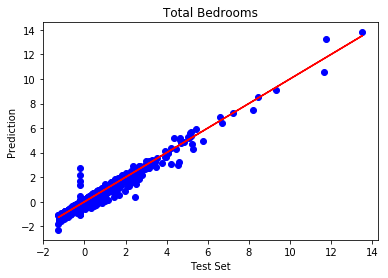

In [42]:
import matplotlib.pyplot as plt
plt.scatter(y_test, predictions, color = 'blue')
plt.plot(y_test, y_test, color = 'red')
plt.title('Total Bedrooms')
plt.xlabel('Test Set')
plt.ylabel('Prediction')
plt.show()